Quantum Generative Adversarial Networks (QGANs) are a fascinating and emerging concept in the realm of quantum machine learning. QGANs combine the strengths of quantum computing with the adversarial training process of classical GANs to generate complex data distributions more efficiently.

At its core, a QGAN consists of two main components: a generator and a discriminator. The generator's role is to produce data samples that mimic the true data distribution, while the discriminator's job is to distinguish between real data samples and those generated by the generator. The two networks are trained in opposition, with the generator aiming to fool the discriminator, and the discriminator striving to correctly identify the generated samples.

In the quantum context, the generator and discriminator can both be represented as quantum circuits. The generator circuit prepares a quantum state based on a set of parameters, and the discriminator circuit performs measurements to classify the state. The optimization of the generator's parameters is key to improving the quality of the generated samples.

One of the primary challenges in implementing QGANs is the efficient optimization of the quantum generator. This involves finding the set of parameters that allow the generator to produce data samples indistinguishable from the real data, as judged by the discriminator. The optimization process typically leverages classical optimization algorithms that update the parameters based on the discriminator's feedback.

In our specific implementation, we start by defining the quantum generator circuit. The generator circuit uses a parameterized rotation gate to prepare a quantum state. The discriminator circuit is simpler, focusing on measuring the state produced by the generator. These circuits are simulated using a quantum simulator, such as `AerSimulator` from Qiskit, which allows us to run and analyze quantum circuits classically.

The cost function for the generator is designed to evaluate how well the generated data matches the real data. This function combines the generator and discriminator circuits and runs them on the simulator. The measurement results from the discriminator provide feedback on the generator's performance. By minimizing this cost function using an optimizer like COBYLA, we iteratively adjust the generator's parameters to improve its performance.

The optimization process can be mathematically represented as follows:

$$
\min_{\theta} \left( 1 - \frac{\text{counts}('1')}{\text{total counts}} \right)
$$

Where:
* $\theta$ represents the parameters of the generator circuit.
* $\text{counts}('1')$ is the number of times the discriminator measures the state as '1'.
* $\text{total counts}$ is the total number of measurements.


This formula indicates that we aim to minimize the probability that the discriminator correctly identifies the generated state as 'fake,' thereby improving the generator's ability to produce realistic samples.

QGANs offer a promising avenue for leveraging quantum computing in generative modeling tasks. By efficiently optimizing quantum circuits, we can potentially surpass classical GANs in generating complex data distributions, especially as quantum hardware continues to advance. Understanding and implementing QGANs can open new frontiers in quantum machine learning and data science.

In [12]:
# Import libraries
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_algorithms.optimizers import COBYLA

In [13]:
# Define the quantum generator
def generator_circuit(params):
    qc = QuantumCircuit(1, 1)
    qc.ry(params[0], 0)
    return qc

In [14]:
# Define the quantum discriminator
def discriminator_circuit():
    qc = QuantumCircuit(1, 1)
    qc.measure(0, 0)
    return qc

In [15]:
# Create the simulator
simulator = AerSimulator()

In [16]:
# Define the cost function for the generator
def generator_cost(params):
    qc = generator_circuit(params)
    qc.compose(discriminator_circuit(), inplace=True)
    transpiled_qc = transpile(qc, simulator)
    result = simulator.run(transpiled_qc).result()
    counts = result.get_counts()
    probability_of_one = counts.get('1', 0) / sum(counts.values())
    return 1 - probability_of_one

In [17]:
# Initialize the parameters
initial_params = np.random.rand(1) * 2 * np.pi

In [18]:
# Optimize the generator parameters
optimizer = COBYLA(maxiter=100)
result = optimizer.minimize(generator_cost, initial_params)

In [19]:
# Print the optimized parameters
print("Optimized parameters:", result.x)

Optimized parameters: [3.13068939]


In [20]:
# Final generator circuit
optimized_qc = generator_circuit(result.x)
print(optimized_qc) 

     ┌────────────┐
  q: ┤ Ry(3.1307) ├
     └────────────┘
c: 1/══════════════
                   


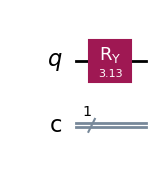

In [21]:
# Visualize the final generator circuit
optimized_qc.draw('mpl')